In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [10]:
#change the filepaths to read the files in the training set
print(os.listdir('/Users/ianhoaglund/physionet-challenge-2019early-detection-of-sepsis/training'))
df = pd.DataFrame()
for file in os.listdir('/Users/ianhoaglund/physionet-challenge-2019early-detection-of-sepsis/training/'):
    tempdf = pd.read_csv("/Users/ianhoaglund/physionet-challenge-2019early-detection-of-sepsis/training/" + file, sep="|")
    df = df.append(tempdf)
#    print("loop", file) I just used this to make sure my computer didnt freeze 

['p000001.psv', 'p000002.psv', 'p000003.psv', 'p000004.psv', 'p000005.psv', 'p000006.psv', 'p000007.psv', 'p000008.psv', 'p000009.psv', 'p000010.psv', 'p000011.psv', 'p000012.psv', 'p000013.psv', 'p000014.psv', 'p000015.psv', 'p000016.psv', 'p000017.psv', 'p000018.psv', 'p000019.psv', 'p000020.psv', 'p000021.psv', 'p000022.psv', 'p000023.psv', 'p000024.psv', 'p000025.psv', 'p000026.psv', 'p000027.psv', 'p000028.psv', 'p000029.psv', 'p000030.psv', 'p000031.psv', 'p000032.psv', 'p000033.psv', 'p000034.psv', 'p000035.psv', 'p000036.psv', 'p000037.psv', 'p000038.psv', 'p000039.psv', 'p000040.psv', 'p000041.psv', 'p000042.psv', 'p000043.psv', 'p000044.psv', 'p000045.psv', 'p000046.psv', 'p000047.psv', 'p000048.psv', 'p000049.psv', 'p000050.psv', 'p000051.psv', 'p000052.psv', 'p000053.psv', 'p000054.psv', 'p000055.psv', 'p000056.psv', 'p000057.psv', 'p000058.psv', 'p000059.psv', 'p000060.psv', 'p000061.psv', 'p000062.psv', 'p000063.psv', 'p000064.psv', 'p000065.psv', 'p000066.psv', 'p000067.

In [11]:
#Change this filepath to save the combined csv file
df.to_csv("/Users/ianhoaglund/physionet-challenge-2019early-detection-of-sepsis/CombinedData.csv")

In [12]:
df.head

<bound method NDFrame.head of        HR  O2Sat   Temp    SBP     MAP    DBP  Resp  EtCO2  BaseExcess  HCO3  \
0     NaN    NaN    NaN    NaN     NaN    NaN   NaN    NaN         NaN   NaN   
1    97.0   95.0    NaN   98.0   75.33    NaN  19.0    NaN         NaN   NaN   
2    89.0   99.0    NaN  122.0   86.00    NaN  22.0    NaN         NaN   NaN   
3    90.0   95.0    NaN    NaN     NaN    NaN  30.0    NaN        24.0   NaN   
4   103.0   88.5    NaN  122.0   91.33    NaN  24.5    NaN         NaN   NaN   
..    ...    ...    ...    ...     ...    ...   ...    ...         ...   ...   
28   88.0   98.0    NaN  135.0   81.00   64.0  16.0    NaN         NaN   NaN   
29   96.0   98.0  38.72  174.0   97.00   72.0  16.0    NaN         2.0   NaN   
30  140.0   97.0    NaN  133.0   81.50   62.5  16.0    NaN         NaN   NaN   
31  120.0   96.0    NaN  154.0  118.00  105.0  16.0    NaN         NaN   NaN   
32  115.0   95.0    NaN  150.0  117.00  104.0  16.0    NaN         NaN   NaN   

    ...  

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [15]:
#You dont need to run this cell to find the means
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [24]:
#You dont need to run this cell to find the means
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "sepsis analysis"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [17]:
#You dont need to run this cell to find the means
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


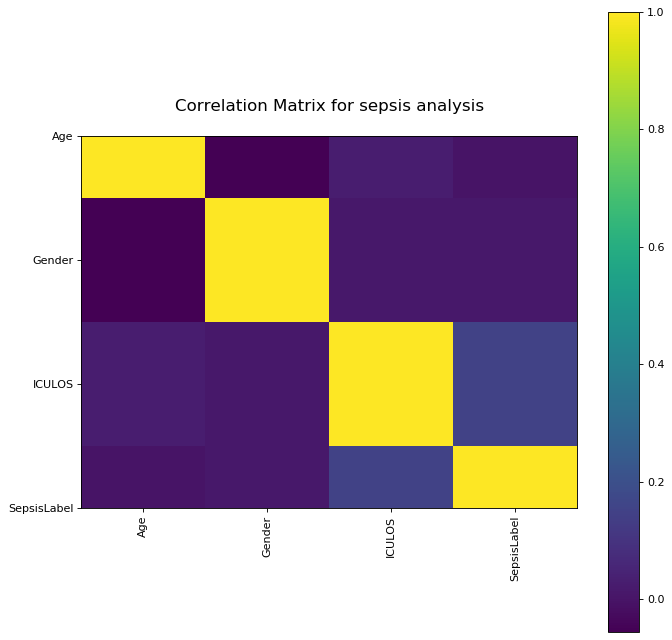

In [26]:
#You dont need to run this cell to find the means (it takes a while to run)
plotCorrelationMatrix(df,10)

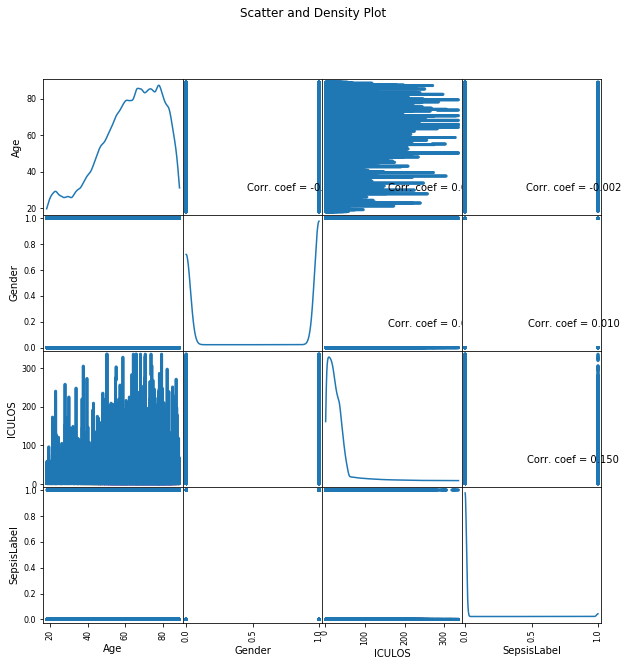

In [28]:
#You dont need to run this cell to find the means (it takes a while to run)
plotScatterMatrix(df,10,10)

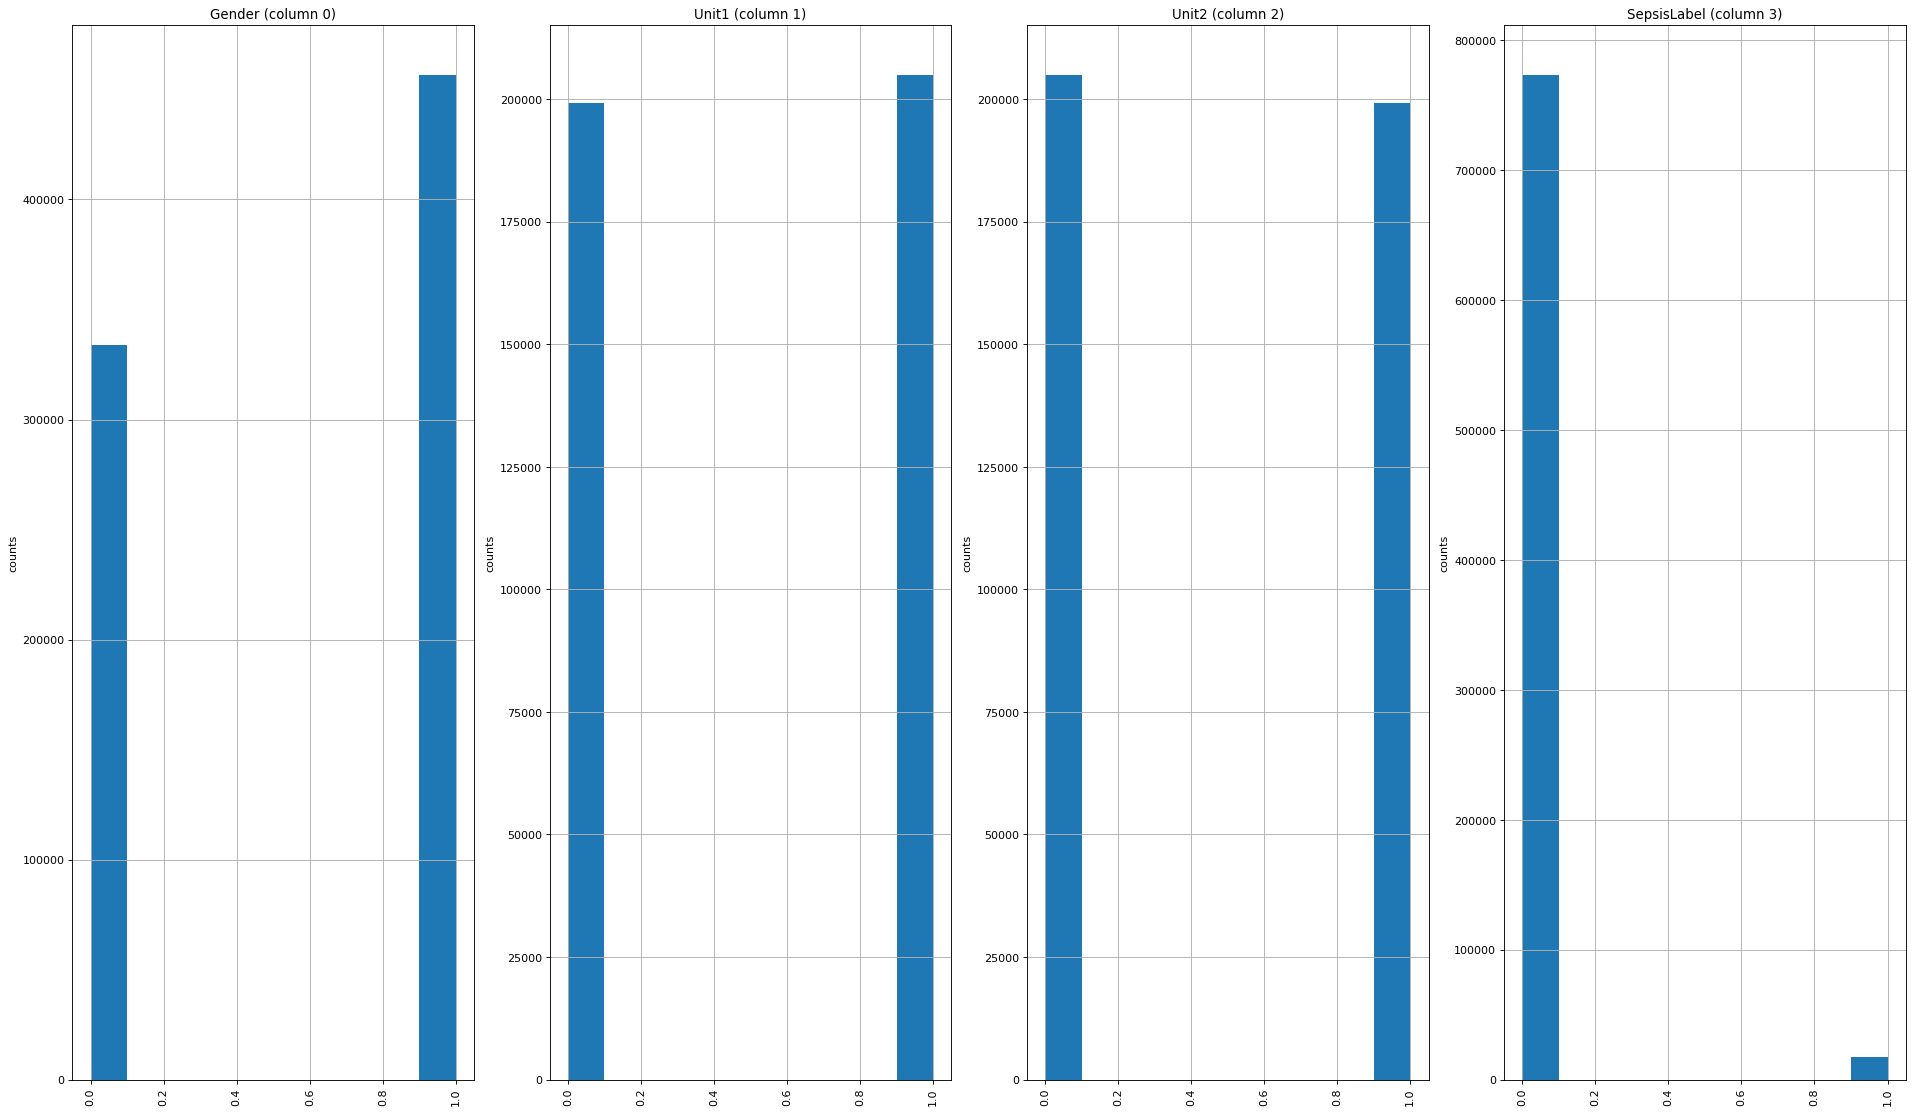

In [30]:
#You dont need to run this cell to find the means (it takes a while to run)
plotPerColumnDistribution(df, 10, 4)

In [29]:
df.mean(axis=0)

HR                   84.985264
O2Sat                97.265688
Temp                 37.026737
SBP                 120.962359
MAP                  78.767345
DBP                  59.985809
Resp                 18.773460
EtCO2                      NaN
BaseExcess           -0.647537
HCO3                 24.094476
FiO2                  0.526248
pH                    7.380243
PaCO2                41.166147
SaO2                 91.215456
AST                 356.207530
BUN                  24.346709
Alkalinephos        114.203304
Calcium               8.316977
Chloride            105.765062
Creatinine            1.404382
Bilirubin_direct      3.114213
Glucose             133.609221
Lactate               2.469203
Magnesium             2.041004
Phosphate             3.588573
Potassium             4.161507
Bilirubin_total       2.694403
TroponinI             9.288187
Hct                  30.674895
Hgb                  10.582028
PTT                  40.781937
WBC                  11.936604
Fibrinog